In [1]:
# Algebraic flow equations using Gauss elimination method and matrix multiplication.

import numpy as np

A = np.array([[0,0.5,0.33,0],
              [1,0,0.33,0],
              [0,0,0,1],
              [0,0.5,0.33,0]])

d = 0.85
iden_mat = np.identity(A.shape[0])
damping_factor_mul = np.multiply(A,0.85)
A_damped = np.subtract(iden_mat,damping_factor_mul)
b = ((1-d)/A.shape[0])*np.ones(A.shape[0])

R = np.linalg.solve(A_damped, b)

print('Pageranks using Gauss elimination:')
print(f'A = {R[0]*100:.4f}%\nB = {R[1]*100:.4f}%\nC = {R[2]*100:.4f}%\nD = {R[3]*100:.4f}%\n')

r = np.linalg.inv(A_damped).dot(b)
print('Pageranks using inverse matrix multiplication:')
print(f'A = {r[0]*100:.4f}%\nB = {r[1]*100:.4f}%\nC = {r[2]*100:.4f}%\nD = {r[3]*100:.4f}%\n')

Pageranks using Gauss elimination:
A = 22.8856%
B = 29.7112%
C = 23.2028%
D = 22.8856%

Pageranks using inverse matrix multiplication:
A = 22.8856%
B = 29.7112%
C = 23.2028%
D = 22.8856%



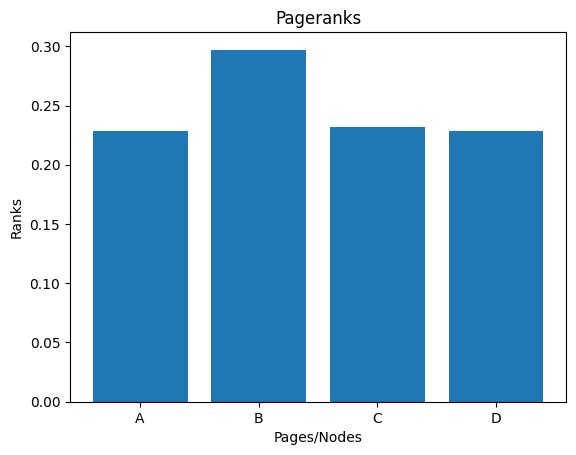

In [2]:
# Visualizing - Bar graph.

%matplotlib inline
import matplotlib.pyplot as plt

x = ['A', 'B', 'C', 'D']
y = [R[0], R[1], R[2], R[3]]
plt.bar(x, y)
plt.title('Pageranks')
plt.xlabel('Pages/Nodes')
plt.ylabel('Ranks')
plt.show()

In [3]:
# Power iteration method.

import numpy as np

def get_pagerank(A, n=100, d=0.85):
    N = A.shape[1]
    v = np.random.rand(N, 1)
    v = v / np.linalg.norm(v, 1)
    A_hat = (d * A + (1 - d) / N)
    for i in range(n):
        v = A_hat @ v
    return v

# Matrix of Figure 3
A = np.array([[0, 0, 0, 0, 1],
              [0.5, 0, 0, 0, 0],
              [0.5, 0, 0, 0, 0],
              [0, 1, 0.5, 0, 0],
              [0, 0, 0.5, 1, 0]])

r = get_pagerank(A, 100, 0.85)
r = r.transpose()

print('Pageranks using power iteration:')
print(f'A = {r[0][0]*100:.4f}%\nB = {r[0][1]*100:.4f}%\nC = {r[0][2]*100:.4f}%\nD = {r[0][3]*100:.4f}%\nE = {r[0][4]*100:.4f}%\n')

Pageranks using power iteration:
A = 25.4192%
B = 13.8032%
C = 13.8032%
D = 20.5990%
E = 26.3755%



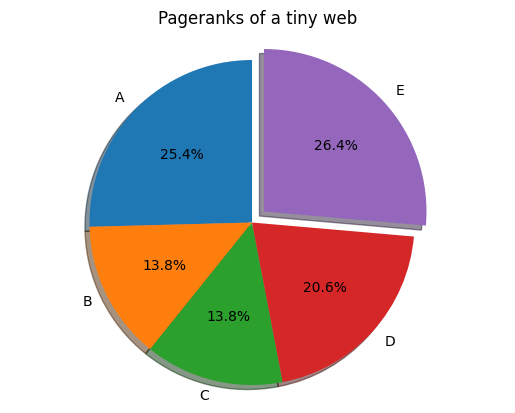

In [4]:
# Visualizing - Pie chart.

%matplotlib inline
import matplotlib.pyplot as plt

labels = ['A', 'B', 'C', 'D', 'E']
ranks = [r[0][0], r[0][1], r[0][2], r[0][3], r[0][4]]
explode = (0,0,0,0,0.1)
fig1, ax1 = plt.subplots()
ax1.pie(ranks, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')
ax1.set_title('Pageranks of a tiny web')
plt.show()

The following video gives a perfect idea of how power iteration works.

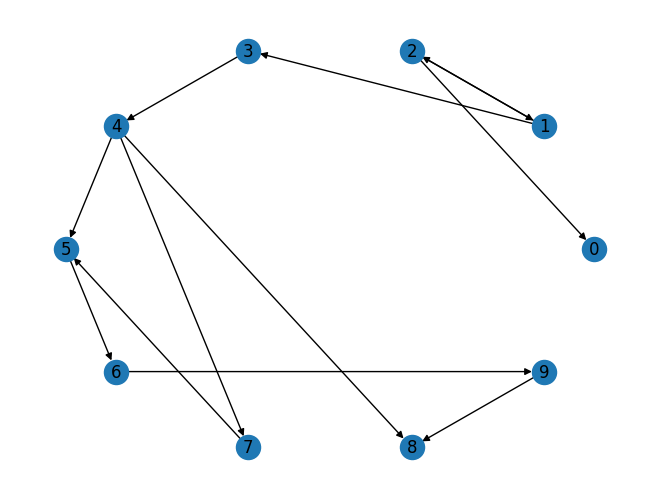

In [6]:
# Example using networkx module.
import networkx as nx

g = nx.DiGraph()

# Now we will add the nodes (10 nodes in total).
g.add_node(0)
g.add_node(1)
g.add_node(2)
g.add_node(3)
g.add_node(4)
g.add_node(5)
g.add_node(6)
g.add_node(7)
g.add_node(8)
g.add_node(9)

# We will specify the edges as the Figure 3.
g.add_edge(1,2)
g.add_edge(1,3)
g.add_edge(2,1)
g.add_edge(2,0)
g.add_edge(3,4)
g.add_edge(4,5)
g.add_edge(4,7)
g.add_edge(4,8)
g.add_edge(5,6)
g.add_edge(6,9)
g.add_edge(7,5)
g.add_edge(9,8)

# Drawing the graph.
nx.draw_circular(g, with_labels=True)

In [7]:
pr = nx.pagerank(g, alpha=0.85)
print('Pageranks are:')
print(pr)

Pageranks are:
{0: 0.06371265831864627, 1: 0.06371265831864627, 2: 0.06371265831864627, 3: 0.06371265831864627, 4: 0.09079071458241554, 5: 0.11536416358112078, 6: 0.13469458092045683, 7: 0.062358777176313135, 8: 0.19081597432731678, 9: 0.151125156137792}


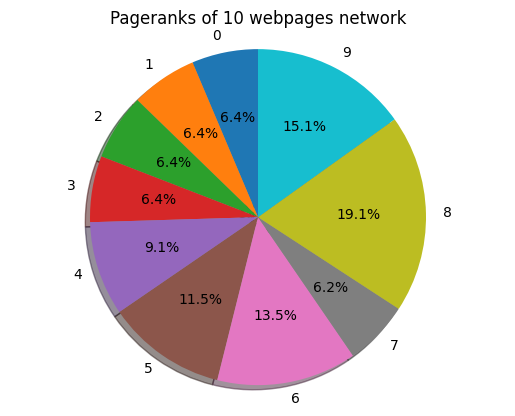

In [8]:
# Visualizing - Pie chart.

%matplotlib inline
import matplotlib.pyplot as plt

labels = [i for i in range(10)]
ranks = [r for r in pr.values()]
fig1, ax1 = plt.subplots()
ax1.pie(ranks, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')
ax1.set_title('Pageranks of 10 webpages network')
plt.show()

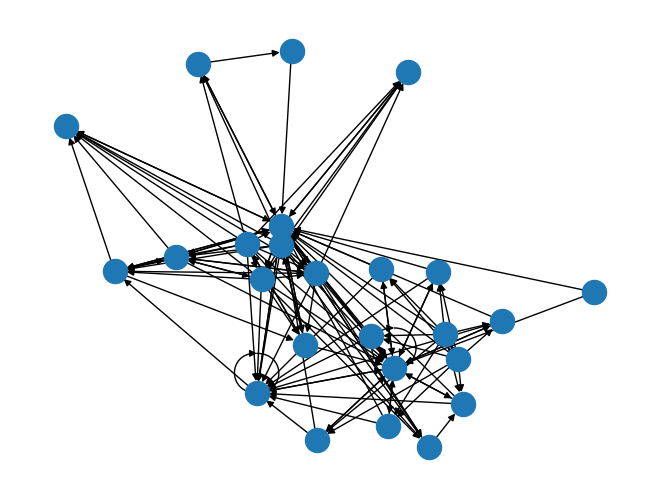

In [9]:
import networkx as nx

network_with_links = {'Main': ['AdmissionOffice', 'GraduateStudies', 'Donate', 'FEdDepartment', 'Registrar',
                               'Blackboard', 'Library', 'Eprints', 'Careers',
                               'BiddingSystem', 'PhoneDirectory'],
                      'President': ['Main', 'AdmissionOffice', 'GraduateStudies', 'Donate', 'FEdDepartment',
                                    'Registrar','Blackboard', 'Library', 'Eprints', 'Careers',
                                    'BiddingSystem', 'PhoneDirectory'],
                      'ViceRectors': ['Main', 'AdmissionOffice', 'GraduateStudies', 'Donate', 'FEdDepartment',
                                      'Registrar','Blackboard', 'Library', 'Eprints', 'Careers','BiddingSystem',
                                      'PhoneDirectory'],
                      'AdmissionOffice': ['Main', 'GraduateStudies', 'FEdDepartment', 'Registrar',
                                          'Library', 'PhoneDirectory'],
                      'GraduateStudies': ['Main', 'AdmissionOffice', 'FEdDepartment', 'Registrar','Blackboard',
                                          'Library', 'Eprints', 'Careers',
                                          'BiddingSystem', 'PhoneDirectory'],
                      'Donate': ['Main', 'Alumni'],
                      'FEdDepartment': ['Main', 'AdmissionOffice', 'Registrar','Blackboard', 'Library', 'Eprints', 'Careers',
                                        'BiddingSystem', 'PhoneDirectory'],
                      'Registrar': ['Main', 'AdmissionOffice', 'Eprints', 'PhoneDirectory',],
                      'Blackboard': ['Main', 'Registrar', 'Blackboard', 'Library'],
                      'Library': ['Main', 'Blackboard', 'Library',
                                  'CGS', 'CEAE', 'CCSE', 'CED', 'CIM', 'CSC', 'CPEG'],
                      'Eprints': ['Main', 'President', 'ViceRectors', 'Library'],
                      'Careers': ['Main', 'CPEG'],
                      'BiddingSystem': ['Main'],
                      'PhoneDirectory': ['Main'],
                      'Faculty': ['Main', 'CGS', 'CEAE', 'CCSE', 'CED', 'CIM', 'CSC', 'CPEG', 'Staff'],
                      'Staff': ['Main', 'CGS', 'CEAE', 'CCSE', 'CED', 'CIM', 'CSC', 'CPEG', 'Faculty'],
                      'Alumni': ['Main'],
                      'CGS': ['Main', 'Blackboard', 'Library'],
                      'CEAE': ['Main', 'Blackboard', 'Library'],
                      'CCSE': ['Main', 'Blackboard', 'Library'],
                      'CED': ['Main', 'Blackboard', 'Library'],
                      'CIM': ['Main', 'Blackboard', 'Library'],
                      'CSC': ['Main', 'Blackboard', 'Library'],
                      'CPEG': ['Main', 'Blackboard', 'Library'],
                      'RI': ['Main', 'Library']}

g = nx.DiGraph(network_with_links)
nx.draw(g, with_labels=False)

In [10]:
pageranks = nx.pagerank(g, alpha=0.85)
print(pageranks)

{'Main': 0.2242479362278673, 'President': 0.015361091994256372, 'ViceRectors': 0.015361091994256372, 'AdmissionOffice': 0.044052575402483016, 'GraduateStudies': 0.03174498819352819, 'Donate': 0.025504260197357274, 'FEdDepartment': 0.034443271640721515, 'Registrar': 0.05928040482564738, 'Blackboard': 0.10157007723338228, 'Library': 0.11972189722380958, 'Eprints': 0.044052575402483016, 'Careers': 0.0314554576887333, 'BiddingSystem': 0.0314554576887333, 'PhoneDirectory': 0.050293303398653934, 'Faculty': 0.006625766871182453, 'Staff': 0.006625766871182453, 'Alumni': 0.01683919024276759, 'CGS': 0.01742808489526169, 'CEAE': 0.01742808489526169, 'CCSE': 0.01742808489526169, 'CED': 0.01742808489526169, 'CIM': 0.01742808489526169, 'CSC': 0.01742808489526169, 'CPEG': 0.030796377531384707, 'RI': 0.006000000000000001}


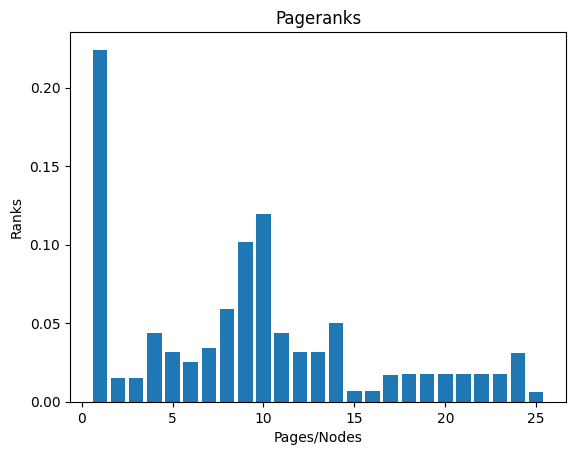

In [11]:
%matplotlib inline
import matplotlib.pyplot as plt

x = [i for i in range(1,26)]
y = pageranks.values()
plt.bar(x, y)
plt.title('Pageranks')
plt.xlabel('Pages/Nodes')
plt.ylabel('Ranks')
plt.show()

PageRank Results:
https://en.wikipedia.org/wiki/Amrita_Vishwa_Vidyapeetham: 0.0150
https://en.wikipedia.org/wiki/Amrita_Vishwa_Vidyapeetham#bodyContent: 0.0150
https://en.wikipedia.org/wiki/Main_Page: 0.0154
https://en.wikipedia.org/wiki/Wikipedia:Contents: 0.0154
https://en.wikipedia.org/wiki/Portal:Current_events: 0.0154
https://en.wikipedia.org/wiki/Special:Random: 0.0154
https://en.wikipedia.org/wiki/Wikipedia:About: 0.0154
https://en.wikipedia.org/wiki/Wikipedia:Contact_us: 0.0154
https://en.wikipedia.org/wiki/Help:Contents: 0.0154
https://en.wikipedia.org/wiki/Help:Introduction: 0.0154


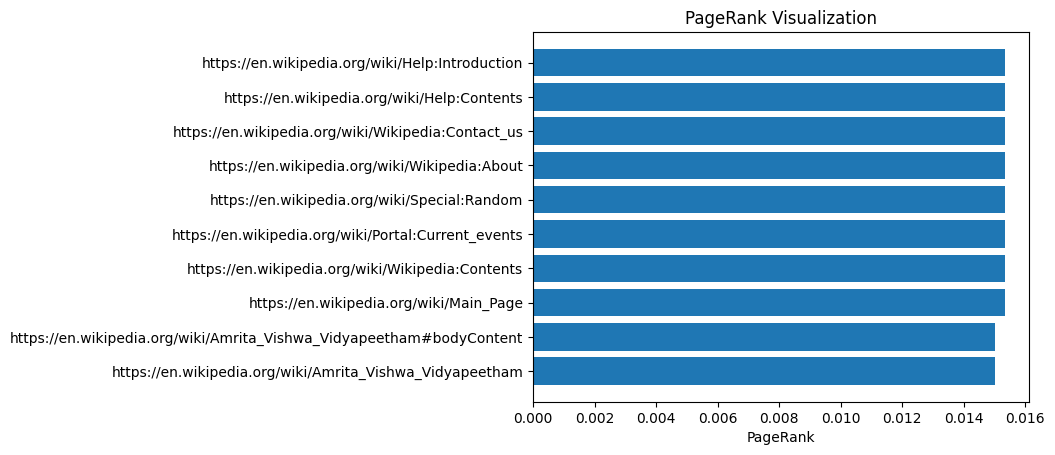

In [14]:
import requests
from bs4 import BeautifulSoup
from urllib.parse import urljoin

# Function to crawl the web
def crawl_web(start_url, max_pages=10):
    graph = {}
    visited = set()
    to_visit = [start_url]

    while to_visit and len(visited) < max_pages:
        url = to_visit.pop(0)
        if url not in visited:
            try:
                response = requests.get(url, timeout=5)
                soup = BeautifulSoup(response.text, 'html.parser')

                # Convert relative links to absolute URLs
                links = [urljoin(url, a['href']) for a in soup.find_all('a', href=True)]

                # Store the graph of the current page and its outgoing links
                graph[url] = links
                to_visit.extend(links)  # Add links to the to_visit list
                visited.add(url)        # Mark the current URL as visited
            except Exception as e:
                print(f"Error fetching {url}: {e}")
    return graph

# Function to compute the PageRank of each page
def compute_pagerank(graph, damping_factor=0.85, max_iterations=100, tolerance=1.0e-6):
    num_pages = len(graph)
    pagerank = {page: 1 / num_pages for page in graph}

    for i in range(max_iterations):
        new_pagerank = {}
        for page in graph:
            rank_sum = 0
            for linked_page in graph:
                if page in graph[linked_page]:  # Check if there's a link from linked_page to page
                    rank_sum += pagerank[linked_page] / len(graph[linked_page])
            new_pagerank[page] = (1 - damping_factor) / num_pages + damping_factor * rank_sum

        # Check for convergence
        diff = sum(abs(new_pagerank[page] - pagerank[page]) for page in graph)
        if diff < tolerance:
            break
        pagerank = new_pagerank

    return pagerank

# Main program
start_url = 'https://en.wikipedia.org/wiki/Amrita_Vishwa_Vidyapeetham'  # Wikipedia page URL
max_pages = 10  # Maximum number of pages to crawl

# Step 1: Crawl the web to build the graph of pages and links
graph = crawl_web(start_url, max_pages)

# Step 2: Compute the PageRank of the pages
pagerank = compute_pagerank(graph)

# Step 3: Print the results
print("PageRank Results:")
for page, rank in pagerank.items():
    print(f"{page}: {rank:.4f}")

# Visualize the PageRank results (Bar chart)
import matplotlib.pyplot as plt

# Create a bar chart to visualize the PageRank values
labels = list(pagerank.keys())
ranks = list(pagerank.values())
plt.barh(labels, ranks)
plt.xlabel('PageRank')
plt.title('PageRank Visualization')
plt.show()
